In [11]:
def import_data(path, messages=True):
  import pandas as pd
  df = pd.read_csv(path)
  if messages: print(df.shape)
  return df

In [12]:
import pandas as pd
pd.set_option('display.max_columns', 10)
df = import_data('cbb.csv')
df.head()

(3523, 24)


,TEAM,CONF,G,W,ADJOE,...,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,...,71.7,8.6,2ND,1.0,2016
1,Wisconsin,B10,40,36,129.1,...,59.3,11.3,2ND,1.0,2015
2,Michigan,B10,40,33,114.4,...,65.9,6.9,2ND,3.0,2018
3,Texas Tech,B12,38,31,115.2,...,67.5,7.0,2ND,3.0,2019
4,Gonzaga,WCC,39,37,117.8,...,71.5,7.7,2ND,1.0,2017


In [13]:
df.columns

Index(['TEAM', 'CONF', 'G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D',
       'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O',
       '3P_D', 'ADJ_T', 'WAB', 'POSTSEASON', 'SEED', 'YEAR'],
      dtype='object')

In [14]:
def univariate(df, sample=500):
  import seaborn as sns
  import matplotlib.pyplot as plt
  import math

  df_results = pd.DataFrame(columns=['bin_groups', 'type', 'missing', 'unique', 'min',
                                    'median', 'max', 'mode', 'mean', 'std', 'skew'])

  for col in df:
    # Features that apply to all dtypes
    dtype = df[col].dtype
    missing = df[col].isna().sum()
    unique = df[col].nunique()
    mode = df[col].mode()[0]
    if pd.api.types.is_numeric_dtype(df[col]):
      # Features for numeric dtypes only
      min = df[col].min()
      max = df[col].max()
      mean = df[col].mean()
      median = df[col].median()
      std = df[col].std()
      skew = df[col].skew()
      df_results.loc[col] = ['-', dtype, missing, unique, min, median, max, mode,
                            round(mean, 2), round(std, 2), round(skew, 2)]
    else:
      # Features for object dtypes only
      flag = df[col].value_counts()[(df[col].value_counts() / df.shape[0]) < 0.05].shape[0]
      df_results.loc[col] = [flag, dtype, missing, unique, '-', '-', '-', mode, '-', '-', '-']

  # Make a sub-DataFrame of features that are objects or have only two values; they will need countplots
  countplots = df_results[(df_results['type']=='object') | (df_results['unique']==2)]
  # Make a sub-DataFrame of features that are floats or ints with many values which will need histograms
  histograms = df_results[(df_results['type']=='float64') | ((df_results['unique']>10) & (df_results['type']=='int64'))]
  histograms = histograms[histograms['unique']>2] # Remove those that are binary

  # Create a set of countplots for the categorical features
  f, ax = plt.subplots(1, countplots.shape[0], figsize=[countplots.shape[0] * 1.5, 1.5])
  for i, col in enumerate(countplots.index):
    g = sns.countplot(data=df, x=col, color='g', ax=ax[i]);
    g.set_yticklabels('')
    g.set_ylabel('')
    ax[i].tick_params(labelrotation=90, left=False)
    ax[i].xaxis.set_label_position('top')
    sns.despine(left=True, top=True, right=True)

  plt.subplots_adjust(hspace=2, wspace=.5)
  plt.show()

  # Create a set of histograms for the numeric features
  f, ax = plt.subplots(1, histograms.shape[0], figsize=[histograms.shape[0] * 1.5, 1.5])
  for i, col in enumerate(histograms.index):
    g = sns.histplot(data=df.sample(n=sample, random_state=1), x=col, color='b', ax=ax[i], kde=True);
    g.set_yticklabels(labels=[])
    g.set_ylabel('')
    ax[i].tick_params(left=False)
    sns.despine(left=True, top=True, right=True)

  plt.subplots_adjust(hspace=2, wspace=.5)
  plt.show()

  return df_results

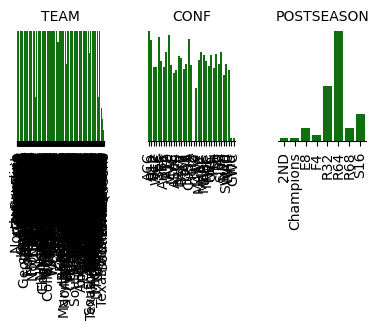

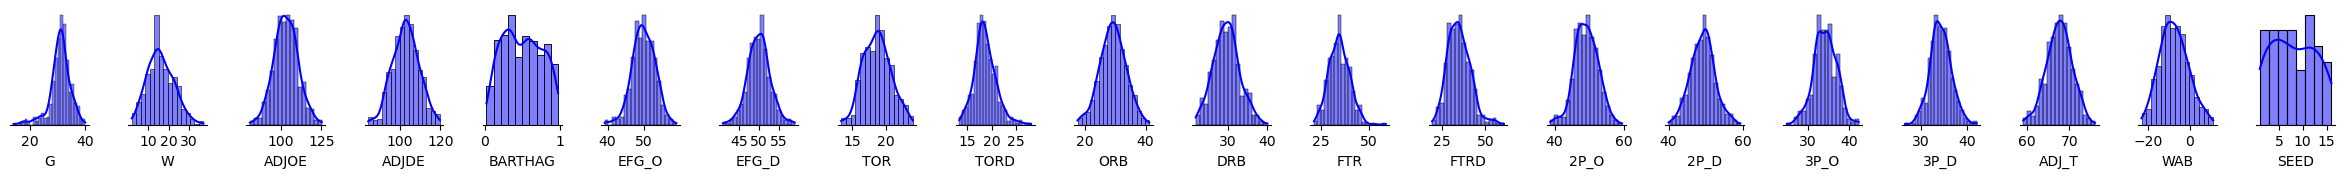

,bin_groups,type,missing,unique,min,median,max,mode,mean,std,skew
TEAM,368,object,0,368,-,-,-,Air Force,-,-,-
CONF,35,object,0,35,-,-,-,ACC,-,-,-
G,-,int64,0,32,5,31.0,40,31,30.49,3.95,-1.27
W,-,int64,0,39,0,16.0,38,14,15.99,6.57,0.24
ADJOE,-,float64,0,384,76.6,102.8,129.1,100.7,103.15,7.26,0.19
ADJDE,-,float64,0,331,84.0,103.2,124.0,102.5,103.15,6.51,-0.04
BARTHAG,-,float64,0,2922,0.005,0.4756,0.9842,0.2165,0.49,0.26,0.14
EFG_O,-,float64,0,187,39.2,49.8,61.0,51.2,49.89,3.08,-0.0
EFG_D,-,float64,0,169,39.6,50.1,60.1,49.6,50.09,2.89,-0.0
TOR,-,float64,0,133,11.9,18.6,27.1,18.7,18.7,2.1,0.26


In [15]:
# We will repeat the full pipline each time as a reminder that it includes all functions:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df = import_data('cbb.csv', messages=False)
univariate(df)

In [16]:
def bin_groups(df, features=[], cutoff=0.05, replace_with='Other', messages=True):
  import pandas as pd

  if len(features) == 0: features = df.columns

  for feat in features:
    if feat in df.columns:  # Make sure they don't accidentally enter a feature name that doesn't exist
      if not pd.api.types.is_numeric_dtype(df[feat]):
        other_list = df[feat].value_counts()[df[feat].value_counts() / df.shape[0] < cutoff].index
        if len(other_list) > 0:
          df.loc[df[feat].isin(other_list), feat] = replace_with
          if messages and len(other_list) > 0: print(f'{feat} has been binned by setting {other_list.values} to {replace_with}')
    else:
      if messages: print(f'{feat} not found in the DataFrame provided. No binning performed')

  return df

In [17]:
# Call the function to update the DataFrame
df = import_data('cbb.csv', messages=False)
df = bin_groups(df, cutoff=0.05)

TEAM has been binned by setting ['North Carolina' 'Fairleigh Dickinson' 'Austin Peay' 'Robert Morris'
 'Wagner' 'St. Francis PA' 'St. Francis NY' 'Sacred Heart'
 "Mount St. Mary's" 'LIU Brooklyn' 'Central Connecticut' 'Canisius'
 'Bryant' 'Wyoming' 'San Diego St.' 'Boise St.' 'Utah St.' 'UNLV'
 'San Jose St.' 'New Mexico' 'Eastern Illinois' 'Eastern Kentucky'
 'Jacksonville St.' 'Morehead St.' 'Utah' 'UCLA' 'Washington St.'
 'Washington' 'USC' 'Stanford' 'Oregon St.' 'Colorado' 'California'
 'Arizona St.' 'Belmont' 'Tennessee Tech' 'Tennessee St.'
 'Tennessee Martin' 'Southeast Missouri St.' 'SIU Edwardsville'
 'Murray St.' 'Nevada' 'Fresno St.' 'Colorado St.' 'Toledo'
 'Northern Illinois' 'Miami OH' 'Kent St.' 'Eastern Michigan'
 'Central Michigan' 'Bowling Green' 'Ball St.' 'Akron' 'Manhattan' 'Siena'
 'Wisconsin' 'Rider' 'Quinnipiac' 'Niagara' 'Monmouth' 'Marist' 'Iona'
 'Ohio' 'Western Michigan' 'Air Force' 'Buffalo' 'Northern Iowa'
 'Southern Illinois' 'Missouri St.' 'Indiana St.'